In [2]:
import pandas as pd
train = pd.read_csv('train_set.csv', sep='\t')
train.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


## 句子长度分析

In [4]:
%pylab inline
train['text_len'] = train['text'].apply(lambda x:len(x.split(' ')))
print(train['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


Text(0, 0.5, 'Histogram of char count')

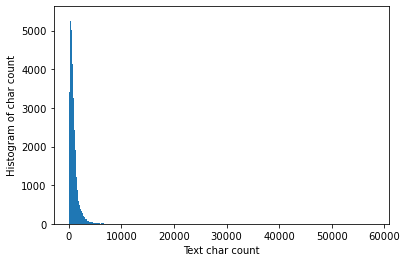

In [7]:
import matplotlib.pyplot as plt
_ = plt.hist(train['text_len'], bins=2000)
plt.xlabel('Text char count')
plt.ylabel('Histogram of char count')

## 类别分析

Text(0, 0.5, 'category')

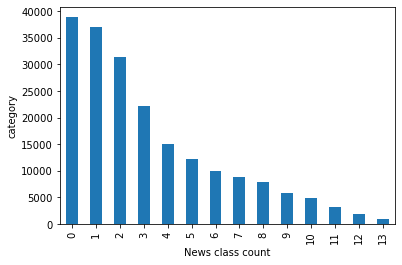

In [8]:
train['label'].value_counts().plot(kind='bar')
plt.xlabel('News class count')
plt.ylabel('category')

## 字符分布分析

In [9]:
from collections import Counter
all_lines = ' '.join(list(train['text']))
word_count = Counter(all_lines.split(' '))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse=True)
print(len(word_count))
print(word_count[0])
print(word_count[-1])

6869
('3750', 7482224)
('3133', 1)


In [10]:
train['text_unique'] = train['text'].apply(lambda x:' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train['text_unique']))
word_count = Counter(all_lines.split(' '))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse=True)

In [11]:
print(word_count[0])
print(word_count[1])

('3750', 197997)
('900', 197653)


## 数据分析的结论

通过上述分析我们可以得出以下结论：

赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
赛题总共包括7000-8000个字符；
通过数据分析，我们还可以得出以下结论：

每个新闻平均字符个数较多，可能需要截断；

由于类别不均衡，会严重影响模型的精度